In [1]:
import sys
sys.path.append("../..") 

In [2]:
import glob,os
import pandas as pd
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import numpy as np

In [3]:
def get_metrics_from_folder(path,N):
    df_tests = []
    for folder in os.listdir(path):
        if folder.startswith('.') == False:
            pathm = os.path.join(path, folder, "metrics.csv")
            pathp = os.path.join(path, folder, "predictions_0.csv")
            # model name:
            #checkpoint = torch.load(chk_path)
            predictions = pd.read_csv(pathp,nrows=1)
            model_name = predictions.model[0]
            # model results:
            df_metrics = pd.read_csv(pathm)
            df_metrics = df_metrics.tail(1)
            df_metrics.loc[:,'model'] = model_name
            df_metrics.loc[:,'N'] = N
            df_tests.append(df_metrics)
    df_test = pd.concat(df_tests, axis=0)
    return df_test

In [4]:
# args
RES_PATH1 = "../../experiments/sim/measurement_error/"
RES_PATH2 = "../../experiments/sim/data_size_5000/"
RES_PATH3 = "../../experiments/sim/non_stationary/"
df1 = get_metrics_from_folder(RES_PATH1,5000)
df1.loc[:,'group'] = "Measurement error"
df2 = get_metrics_from_folder(RES_PATH2,5000)
df2.loc[:,'group'] = "Standard"
df3 = get_metrics_from_folder(RES_PATH3,5000)
df3.loc[:,'group'] = "Non-stationarity"

In [5]:
df = pd.concat((df1,df2,df3))
df.reset_index(inplace=True,drop=True)
df.head()

,crps_mean,ig_mean,int_score_mean,var_pit,int_coverage,int_av_width,int_med_width,rmse,step,model,...,val_loss,val_loss_pred,val_loss_update,epoch,lr-Adam,training_loss,pred_loss,update_loss,test_loss,group
0,0.032805,1.421476,38.764326,0.085168,0.940198,30.878494,30.679299,8.141677,0,Catboost,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Measurement error
1,0.030995,1.484393,35.917427,0.080991,0.954926,30.603546,30.038506,7.666458,1683,ODEGRUModel,...,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,-1.484393,Measurement error
2,0.034842,1.362464,40.626545,0.086543,0.934933,32.440506,32.032799,8.613543,1564,IMODE,...,NaN,NaN,NaN,46.0,NaN,NaN,NaN,NaN,-1.362464,Measurement error
3,0.034613,1.373003,40.156151,0.085706,0.941526,32.619846,32.221680,8.539776,1207,FlowGRUModel,...,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,-1.373003,Measurement error
4,0.031472,1.467095,36.683586,0.081032,0.954996,31.123795,30.760124,7.787443,3264,LSTMModel,...,NaN,NaN,NaN,96.0,NaN,NaN,NaN,NaN,-1.467095,Measurement error


In [6]:
d = {'LinearModel':'LinearModel',
     'Catboost':'Catboost',
     'GRUModel':'TimeGap-GRU',
     'DecayGRUModel':'Decay-GRU',
     'ODEGRUModel':'ODE-GRU',
     'FlowGRUModel':'Flow-GRU',
     'LSTMModel':'TimeGap-LSTM',
     'ODELSTMModel':'ODE-LSTM',
     'FlowLSTMModel':'Flow-LSTM',
     'IMODE':'IMODE'}

In [7]:
df['model_name'] = [d[m] for m in df.model]

In [8]:
df

,crps_mean,ig_mean,int_score_mean,var_pit,int_coverage,int_av_width,int_med_width,rmse,step,model,...,val_loss_pred,val_loss_update,epoch,lr-Adam,training_loss,pred_loss,update_loss,test_loss,group,model_name
0,0.032805,1.421476,38.764326,0.085168,0.940198,30.878494,30.679299,8.141677,0,Catboost,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Measurement error,Catboost
1,0.030995,1.484393,35.917427,0.080991,0.954926,30.603546,30.038506,7.666458,1683,ODEGRUModel,...,NaN,NaN,50.0,NaN,NaN,NaN,NaN,-1.484393,Measurement error,ODE-GRU
2,0.034842,1.362464,40.626545,0.086543,0.934933,32.440506,32.032799,8.613543,1564,IMODE,...,NaN,NaN,46.0,NaN,NaN,NaN,NaN,-1.362464,Measurement error,IMODE
3,0.034613,1.373003,40.156151,0.085706,0.941526,32.619846,32.221680,8.539776,1207,FlowGRUModel,...,NaN,NaN,36.0,NaN,NaN,NaN,NaN,-1.373003,Measurement error,Flow-GRU
4,0.031472,1.467095,36.683586,0.081032,0.954996,31.123795,30.760124,7.787443,3264,LSTMModel,...,NaN,NaN,96.0,NaN,NaN,NaN,NaN,-1.467095,Measurement error,TimeGap-LSTM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.014662,2.233482,18.387186,0.081936,0.934914,13.960984,12.926506,3.757414,0,Catboost,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-stationarity,Catboost
85,0.028820,1.279033,58.239961,0.014113,1.000000,58.239961,58.203659,4.698067,0,LinearModel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-stationarity,LinearModel
86,0.020664,1.833368,27.236242,0.098976,0.888167,16.259474,15.582138,5.121907,918,IMODE,...,NaN,NaN,27.0,NaN,NaN,NaN,NaN,-1.833368,Non-stationarity,IMODE
87,0.012275,2.434746,14.920188,0.089876,0.918304,11.106863,8.961636,3.171861,850,ODELSTMModel,...,NaN,NaN,25.0,NaN,NaN,NaN,NaN,-2.434746,Non-stationarity,ODE-LSTM


In [9]:
df.model_name.unique()

array(['Catboost', 'ODE-GRU', 'IMODE', 'Flow-GRU', 'TimeGap-LSTM',
       'Decay-GRU', 'Flow-LSTM', 'TimeGap-GRU', 'ODE-LSTM', 'LinearModel'],
      dtype=object)

In [10]:
hue_order = list(d.values())

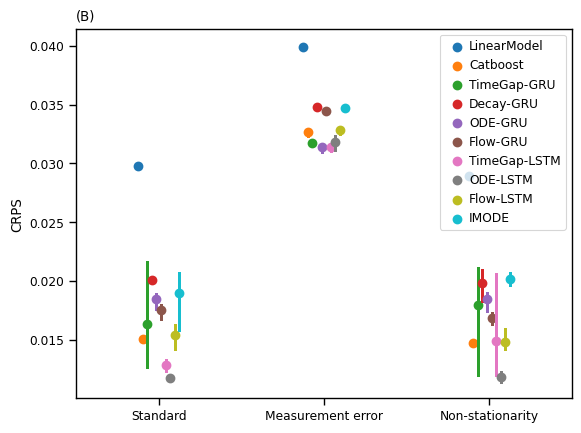

In [11]:
sns.set_context("paper")
f, ax = plt.subplots()
sns.pointplot(x="group", y="crps_mean", hue="model_name",hue_order=hue_order,data=df,dodge=0.25,join=False,
             order = ['Standard','Measurement error','Non-stationarity'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="", handletextpad=0, columnspacing=1,
          loc="upper right", ncol=1, frameon=True)
ax.set_xlabel('')
ax.set_ylabel('CRPS')
ax.set_title('(B)',loc='left')
f.savefig('../../results/measurement_stationarity_crps2.png', dpi=300)
plt.show()

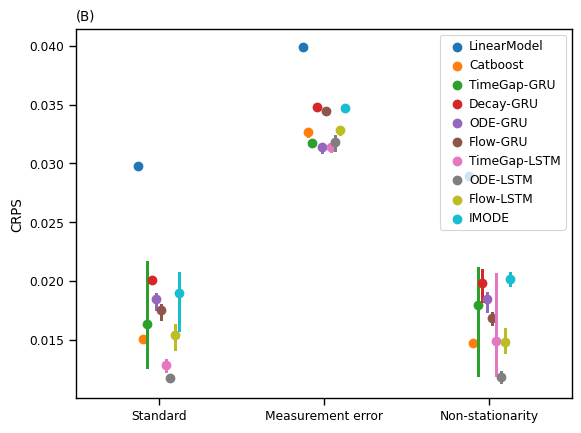

In [12]:
sns.set_context("paper")
f, ax = plt.subplots()
sns.pointplot(x="group", y="crps_mean", hue="model_name",hue_order=hue_order,data=df,dodge=0.25,join=False,
             order = ['Standard','Measurement error','Non-stationarity'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="", handletextpad=0, columnspacing=1,
          loc="upper right", ncol=1, frameon=True)
ax.set_xlabel('')
ax.set_ylabel('CRPS')
ax.set_title('(B)',loc='left')
f.savefig('../../results/measurement_stationarity_crps2.png', dpi=300)
plt.show()

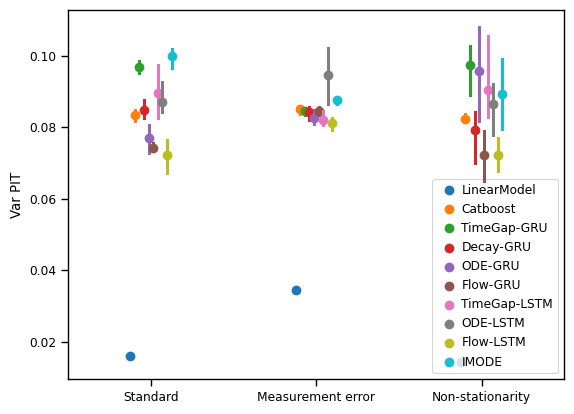

In [13]:
sns.set_context("paper")
f, ax = plt.subplots()
sns.pointplot(x="group", y="var_pit", hue="model_name",hue_order=hue_order,data=df,dodge=0.25,join=False,
             order = ['Standard','Measurement error','Non-stationarity'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="", handletextpad=0, columnspacing=1,
          loc="lower right", ncol=1, frameon=True)
ax.set_xlabel('')
ax.set_ylabel('Var PIT')
ax.set_title('',loc='left')
f.savefig('../../results/measurement_stationarity_var_pit.png', dpi=300)
plt.show()

In [14]:
#crps_mean	ig_mean	int_score_mean	var_pit	int_coverage	int_av_width	int_med_width	rmse

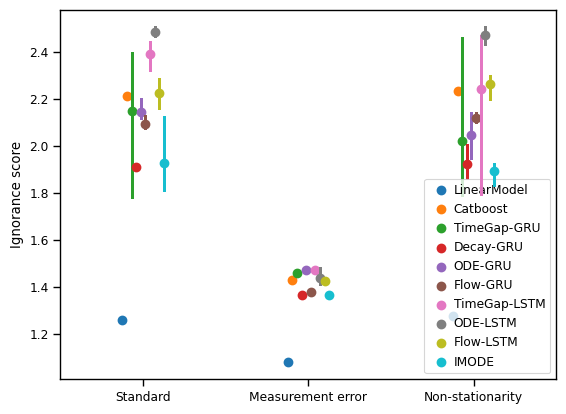

In [15]:
sns.set_context("paper")
f, ax = plt.subplots()
sns.pointplot(x="group", y="ig_mean", hue="model_name",hue_order=hue_order,data=df,dodge=0.25,join=False,
             order = ['Standard','Measurement error','Non-stationarity'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="", handletextpad=0, columnspacing=1,
          loc="lower right", ncol=1, frameon=True)
ax.set_xlabel('')
ax.set_ylabel('Ignorance score')
ax.set_title('',loc='left')
f.savefig('../../results/measurement_stationarity_ig_mean.png', dpi=300)
plt.show()

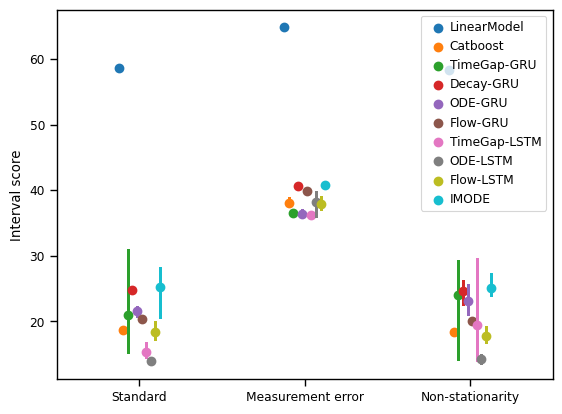

In [16]:
sns.set_context("paper")
f, ax = plt.subplots()
sns.pointplot(x="group", y="int_score_mean", hue="model_name",hue_order=hue_order,data=df,dodge=0.25,join=False,
             order = ['Standard','Measurement error','Non-stationarity'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="", handletextpad=0, columnspacing=1,
          loc="upper right", ncol=1, frameon=True)
ax.set_xlabel('')
ax.set_ylabel('Interval score')
ax.set_title('',loc='left')
f.savefig('../../results/measurement_stationarity_interval_score.png', dpi=300)
plt.show()

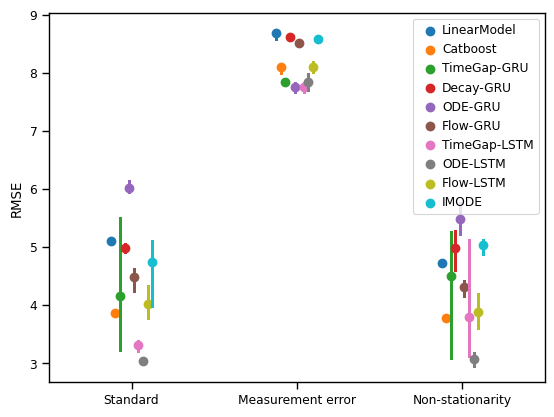

In [17]:
sns.set_context("paper")
f, ax = plt.subplots()
sns.pointplot(x="group", y="rmse", hue="model_name",hue_order=hue_order,data=df,dodge=0.25,join=False,
             order = ['Standard','Measurement error','Non-stationarity'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="", handletextpad=0, columnspacing=1,
          loc="upper right", ncol=1, frameon=True)
ax.set_xlabel('')
ax.set_ylabel('RMSE')
ax.set_title('',loc='left')
f.savefig('../../results/measurement_stationarity_rmse.png', dpi=300)
plt.show()